In [1]:
# importar arquivo como csv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import pylab as pl
from mpl_toolkits import mplot3d
import plotly.graph_objs as go
from sklearn.cluster import SpectralClustering
import plotly as py

In [2]:
combined_csv = pd.read_csv(r"C:\Users\Marcelo\Documents\Hackaton\combined_csv.csv", index_col=None, header=0)

print(combined_csv.shape)

(1499999, 8)


C:\Users\Marcelo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.



In [90]:
stores = pd.read_csv(r"C:\Users\Marcelo\Documents\Hackaton\stores_details.csv",index_col=None, header=0)

In [91]:
#Remove colunas desncessarias de stores
#stores.drop("encrypted_cnpj", inplace=True, axis=1)
#stores.drop("encrypted_cnpj_prefix", inplace=True, axis=1)
stores.drop("encrypted_5_zipcode", inplace=True, axis=1)
stores.drop("encrypted_domain", inplace=True, axis=1)
stores.drop("cnae_desc", inplace=True, axis=1)

In [97]:
#Normaliza dados
stores = stores.fillna(0)
stores = stores.round(1)
stores['cnae_code'] = stores['cnae_code'].round(0)
stores['cnae_code'] = stores.cnae_code.astype(int)
stores['encrypted_cnpj_prefix'] = str(stores.encrypted_cnpj_prefix)

In [104]:
stores[stores['encrypted_cnpj_prefix'] == '3732366666373333383234613163643831636465323838336537623164623665']

,encrypted_cnpj,encrypted_cnpj_prefix,cnae_code,cheque,crediario,credito,debito,deposito,dinheiro,transferencia


In [87]:
x = full[full['cnae_code']==4731800]
#pd.merge(stores, x, on='encrypted_cnpj_prefix')
x

,encrypted_domain,encrypted_cnpj,encrypted_saleid,dateTime,productTotal,prod_fullname,encrypted_buyer_cpf,encrypted_buyer_cnpj,cnae_code,cheque,crediario,credito,debito,deposito,dinheiro,transferencia
11098,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3261383131366661633864353433656333303337646536...,2018-12-07T09:56:37.000Z,50.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
11099,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3764393733646664636238313766383333383866383532...,2018-11-30T09:06:04.000Z,60.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
11100,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3463383031373163313430383163366539313233356531...,2018-12-28T21:36:50.000Z,5.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
11101,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3766613662643032386635383130383637303938313237...,2018-12-01T20:25:05.000Z,50.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
11102,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,6137363134393331366162376463653431633932663965...,2018-10-05T19:07:34.000Z,50.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
11103,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3466666462663638653363363837643236393565353362...,2018-12-09T07:05:29.000Z,15.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
11104,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,6664326130316161376437353837613138326162353562...,2018-12-27T13:56:16.000Z,50.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
11105,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3064316463623033303665376633326462666566366130...,2018-12-12T14:18:17.000Z,15.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
11106,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3062623861313834373639363630393561623565366439...,2018-10-06T17:37:18.000Z,30.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0
11107,6139646137356433363237396637323937336161383832...,510766392a95afd41c6bd526381a,3366643237333638323036363630666235626536386563...,2018-12-04T14:43:23.000Z,40.0,filtro pel 107 tec fil,NaN,NaN,4731800,0.0,0.0,0.0,0.1,0.0,0.9,0.0


In [14]:
full = pd.merge(combined_csv, stores, on='encrypted_cnpj')
full['productTotal'] = full.productTotal.astype(float)
full['productTotal'] = full['productTotal'].round(0)

In [15]:
full.dtypes

encrypted_domain         object
encrypted_cnpj           object
encrypted_saleid         object
dateTime                 object
productTotal            float64
prod_fullname            object
encrypted_buyer_cpf      object
encrypted_buyer_cnpj     object
cnae_code                 int32
cheque                  float64
crediario               float64
credito                 float64
debito                  float64
deposito                float64
dinheiro                float64
transferencia           float64
dtype: object

In [37]:
df = full.groupby('cnae_code')['productTotal'].sum()
print (df.sort_values(ascending=False))
print(full.productTotal.sum())

cnae_code
4729699    43498326.0
4731800    20417052.0
4781400     7650672.0
4782201     4336765.0
5611203     2279838.0
5611201     2232043.0
6463800     1300450.0
4751201     1110583.0
4729602      873195.0
6209100      679683.0
4742300      555787.0
7740300      477914.0
4789001      349982.0
4772500      315913.0
4713002      309982.0
4693100      241048.0
4759899      223905.0
4783101      222182.0
4755501      213809.0
1412601      196382.0
6462000      196333.0
4789099      184178.0
9511800      175985.0
4755502      151313.0
4761003      138849.0
0            136561.0
4763602      115701.0
7020400       98565.0
4754701       92029.0
4782202       89074.0
4642701       81123.0
4712100       71446.0
4774100       70365.0
4763601       57454.0
4789003       55651.0
4930202       55389.0
4639701       46673.0
4789004       31793.0
4755503       31791.0
4771701       25782.0
4752100       16055.0
5611202       13081.0
1091102       12976.0
4713001       12323.0
4681805       10346.0


In [42]:
full[full['encrypted_cnpj']=='1dcc4997ba5d4f628a2606bb17eb'].head(1)

,encrypted_domain,encrypted_cnpj,encrypted_saleid,dateTime,productTotal,prod_fullname,encrypted_buyer_cpf,encrypted_buyer_cnpj,cnae_code,cheque,crediario,credito,debito,deposito,dinheiro,transferencia
1305397,3130346238346439613630366662323861653139623466...,1dcc4997ba5d4f628a2606bb17eb,3834393563356134666635656231663530383238336466...,2018-11-09T15:59:00.000Z,8.0,roots to go original 45g,3264383032613763326131653863326564326130623736...,NaN,4729699,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
lojaMaisVende = full.groupby('encrypted_cnpj')['productTotal'].sum()
print (lojaMaisVende.sort_values(ascending=False))

encrypted_cnpj
1dcc4997ba5d4f628a2606bb17eb    41099211.0
87db6a9e5895a9b0bb0be8b22694     1300450.0
36f6ec5f76de55a9137968fd0fde      976860.0
06adb7c8f614e7536089d058198f      926640.0
a74a729c7a3d3c0a6c6f59bb07c5      903409.0
b1b263a8791b7592c2ccc136cb9f      817384.0
ac59cda296731f6cbb3d74a37007      743212.0
cd406b5d1bca06e7ea9cdc74e14b      623762.0
f7005fc91e674659fc585a904310      514501.0
59a18547f5929aa5dbfca7db947e      483523.0
c5c5b8127b545df4333da4962090      404893.0
ff75f738684cf231d31c2506529f      395987.0
93735eef18147dcf6ec17cbd1fd2      378082.0
21404ebaa0106ca20ae283c89271      340292.0
2588f74a7e69af161593cb22f50b      340004.0
0f988a7502f212615b2a6ca18fae      331077.0
1b4f280f6b1763ec568a2062c9f4      313970.0
5f78d4dc42bcaabeb2b4c21bd46a      305670.0
8ef4d40b852168ea8e3bbc4c89a0      293938.0
a06e4c078703f2f392ae737aaf19      273026.0
5c018352468be7c96aa103100735      271744.0
bf27cac8394c0fc4f39e98f7f17c      264763.0
878782faee70dd571e8b2b589adf      25427

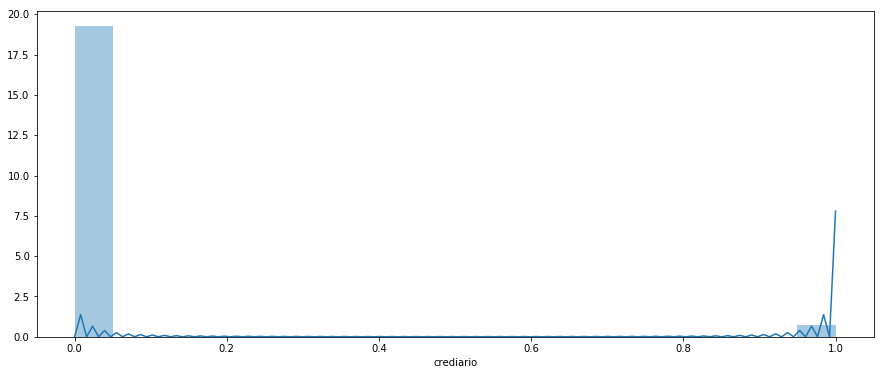

In [23]:
plt.figure(1 , figsize = (15 , 6))

#plt.plot( full['productTotal'], full['credito'])

sns.distplot(full['crediario'] , bins = 20)
#plt.title("Compra com cheque")
#plt.xlabel("credito")
#plt.ylabel("total compra")
plt.show()